In [3]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.cm as cmx
import matplotlib.colors as colors
import pandas as pd
from sklearn.linear_model import LogisticRegression as LogReg
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer as Tfidf
from sklearn.neighbors import KNeighborsClassifier as KNN
from sklearn.decomposition import PCA
%matplotlib inline

In [4]:
#read datasets in
twitter = pd.read_csv("./datasets/twitter_sample.csv")
twitter_clone = pd.read_csv("./datasets/twitterclone_to_1000.csv")

In [5]:
#check their size
print "Shape of twitter set:", twitter.shape, " Shape of dark web twitter clone set:", twitter_clone.shape

Shape of twitter set: (99999, 4)  Shape of dark web twitter clone set: (23728, 4)


In [6]:
#vectorize clearweb tweets

vectorizer = CountVectorizer(stop_words='english', binary=True) #ignores stop words such as "a," "the," etc.
posts = twitter['content'].values

#tokenize words
tokens = vectorizer.fit_transform([unicode(a, errors='replace') for a in posts])

#get word frequencies
frequencies = zip(vectorizer.get_feature_names(), 
                  np.array(tokens.sum(axis=0)).ravel()) #learned from documentation on scipy arrays

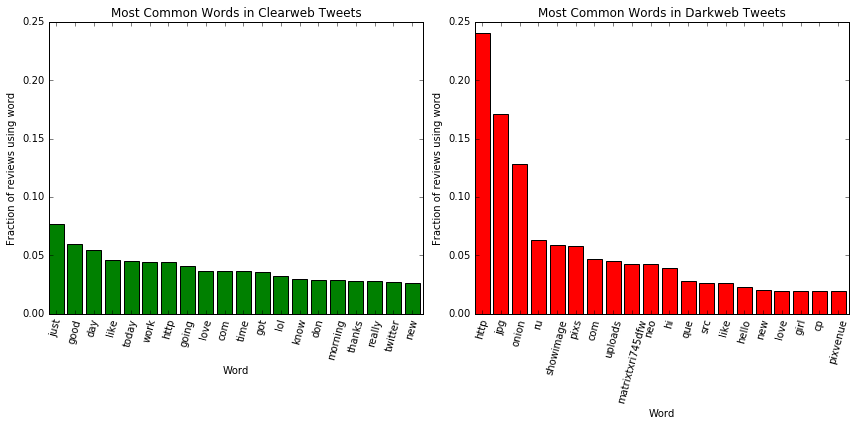

In [8]:
def freq_plt(axis, title, freq, tok_size, color): #generates bar graphs as per schema above
    
    x_lab = np.arange(20)
    words, incidences = zip(*freq[:20])
    incidences = np.array(incidences)
    
    axis.bar(x_lab, incidences/float(tok_size), color=color)
    axis.set_xticks(x_lab+.4)
    axis.set_xticklabels(words)
    axis.set_title(title)
    axis.set_xlabel("Word")
    axis.set_ylim(0,0.25)
    axis.set_ylabel("Fraction of reviews using word")


c_revs = twitter['content'].values #clearweb tweets
d_revs = twitter_clone['content'].values #darkweb tweets

c_tokens = vectorizer.fit_transform([unicode(a, errors='replace') for a in c_revs]) #tokenize and get words by frequency
c_freq = sorted(zip(vectorizer.get_feature_names(), np.array(c_tokens.sum(axis=0)).ravel()), key=lambda x: -x[1])

d_tokens = vectorizer.fit_transform([unicode(str(a), errors='replace') for a in d_revs]) #tokenize and get words by frequency
d_freq = sorted(zip(vectorizer.get_feature_names(), np.array(d_tokens.sum(axis=0)).ravel()), key=lambda x: -x[1])

fig, ax = plt.subplots(1, 2, figsize=(12, 6))

freq_plt(ax[0], "Most Common Words in Clearweb Tweets", c_freq, c_tokens.shape[0], "green")
freq_plt(ax[1], "Most Common Words in Darkweb Tweets", d_freq, d_tokens.shape[0], "red")


for ax in fig.axes: #plot most common words
    matplotlib.pyplot.sca(ax)
    plt.xticks(rotation=75)
    
plt.tight_layout()